<a href="https://colab.research.google.com/github/laugustovieira/prophet_covid/blob/main/Desafio_modulo03_aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

In [24]:
url = '/content/drive/MyDrive/Dados_BootCamp/dados_covid_sp.csv'  
dados = pd.read_csv(url, sep=";")

In [25]:
dados["datahora"] = pd.to_datetime(dados["datahora"], format="%Y-%m-%d")

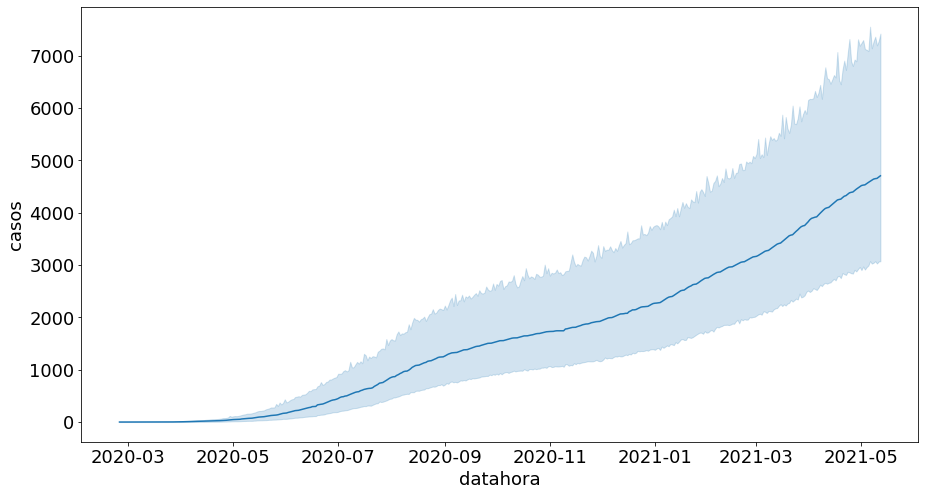

In [5]:
mpl.rcParams["font.size"] = 18
mpl.rcParams["figure.figsize"]= (15,8)
sns.lineplot(x="datahora",y="casos", data = dados)

In [6]:
dados_sp = dados.query("nome_munic == 'São Paulo'")

# Escolhe outro município e realizar as consultas

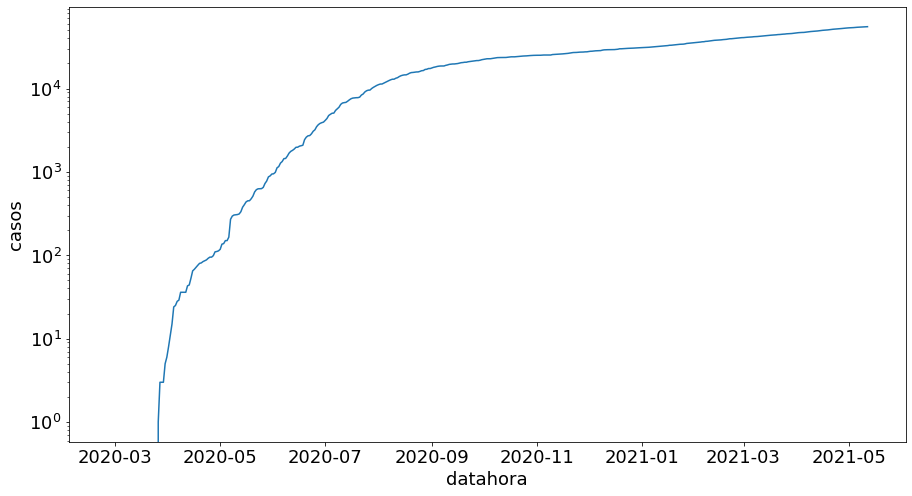

In [7]:
dados_rp = dados.query("nome_munic == 'Ribeirão Preto'")

sns.lineplot(x="datahora",y="casos", data = dados_rp)
mpl.pyplot.yscale("log")

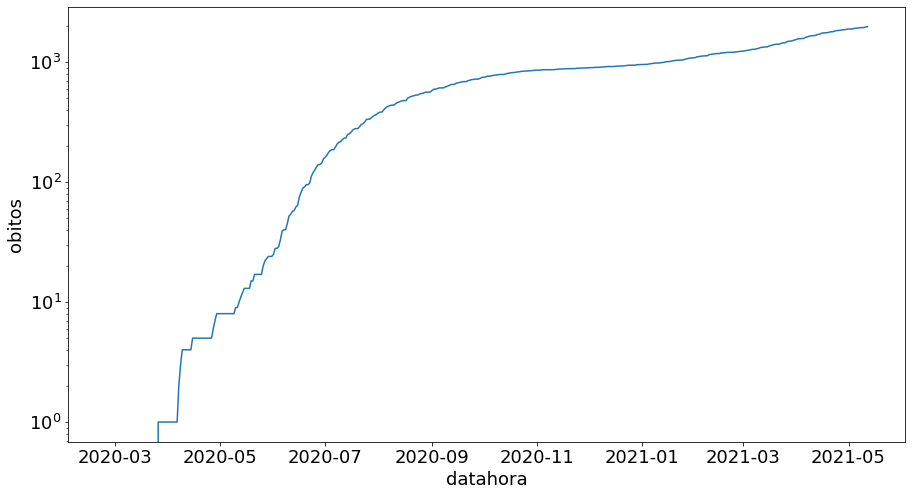

In [105]:
sns.lineplot(x="datahora",y="obitos", data = dados_rp)
mpl.pyplot.yscale("log")

#Desafio - Filtrar a base com outra função

In [8]:
dados_rp2 = dados[dados['nome_munic']=="Ribeirão Preto"]

In [9]:
dados_rp2.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
487,Ribeirão Preto,3543402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Ribeirão Preto,11,Ribeirão Preto,1,683777,110330,65092,0,8.0,"-21,1699","-47,8099",9
1132,Ribeirão Preto,3543402,26,2,2020-02-26,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Ribeirão Preto,11,Ribeirão Preto,1,683777,110330,65092,0,8.0,"-21,1699","-47,8099",9
1777,Ribeirão Preto,3543402,27,2,2020-02-27,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Ribeirão Preto,11,Ribeirão Preto,1,683777,110330,65092,0,8.0,"-21,1699","-47,8099",9
2422,Ribeirão Preto,3543402,28,2,2020-02-28,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Ribeirão Preto,11,Ribeirão Preto,1,683777,110330,65092,0,8.0,"-21,1699","-47,8099",9
3067,Ribeirão Preto,3543402,29,2,2020-02-29,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Ribeirão Preto,11,Ribeirão Preto,1,683777,110330,65092,0,8.0,"-21,1699","-47,8099",9


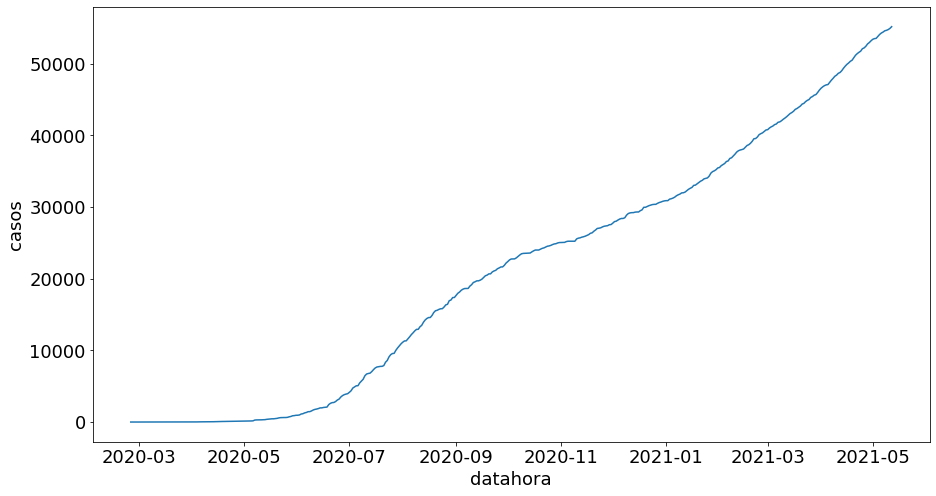

In [10]:
sns.lineplot(x="datahora",y="casos", data = dados_rp2)

#Desafio 01: Um notebook sem warnings

In [11]:
dados_sp["taxa_de_crescimento_casos"] = dados_sp["casos_novos"].diff()
dados_sp["taxa_de_crescimento_obitos"] = dados_sp["obitos_novos"].diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
#definir um indice
dados_sp = dados_sp.set_index("nome_munic")

In [13]:
dados_sp["taxa_de_crescimento_casos"] = dados_sp["casos_novos"].diff()
dados_sp["taxa_de_crescimento_obitos"] = dados_sp["obitos_novos"].diff()

dados_sp["media_movel_casos"] = dados_sp["casos_novos"].rolling(window=7, center=False).mean()
dados_sp["media_movel_obitos"] = dados_sp["obitos_novos"].rolling(window=7, center=False).mean()

#Desafio 02: Pico taxa de casos novos coincide com taxa dos óbitos novos.

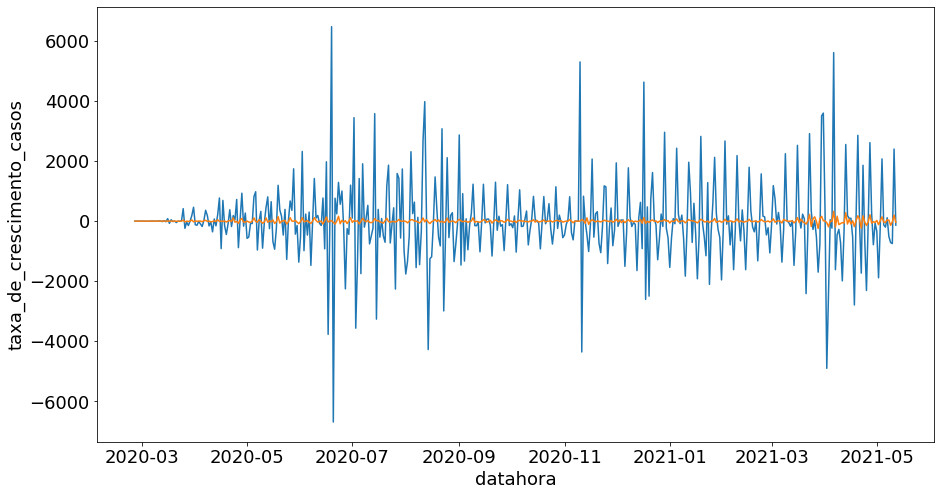

In [14]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data = dados_sp)
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data = dados_sp)

In [15]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year
dados_sp['mes'] = pd.DatetimeIndex(dados_sp['datahora']).month

In [16]:
dados_periodo2021 = dados_sp.query("ano == 2021 & mes >=4 & mes <= 5")

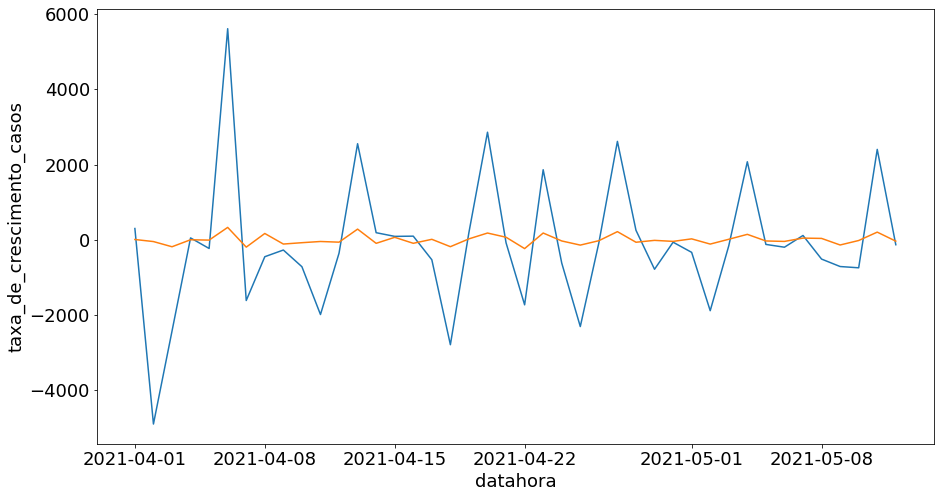

In [17]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data = dados_periodo2021)
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data = dados_periodo2021)

Abaixo percebe-se que o aumento do número de casos de Covid tem relação com o número de óbitos.

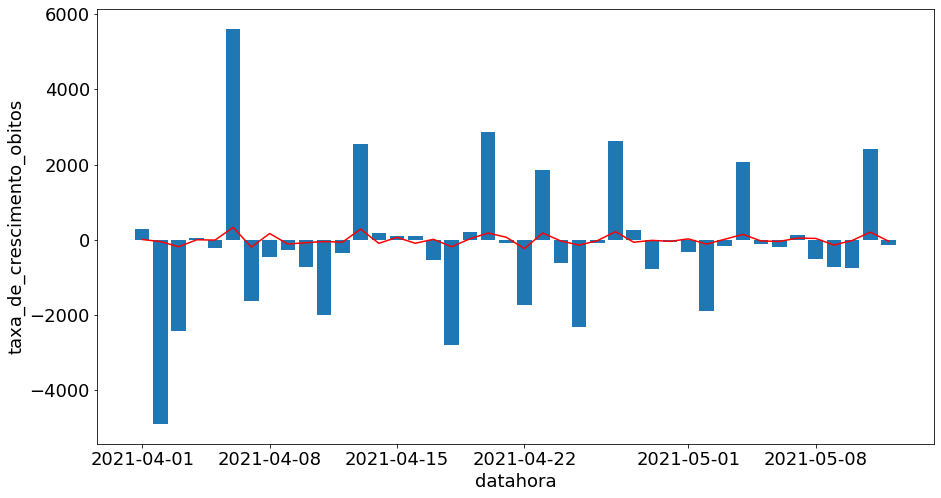

In [18]:
plt.bar(dados_periodo2021['datahora'], dados_periodo2021['taxa_de_crescimento_casos'])
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data = dados_periodo2021, color = 'red')

#Desafio 03: Fazer melhorias nos gráficos.

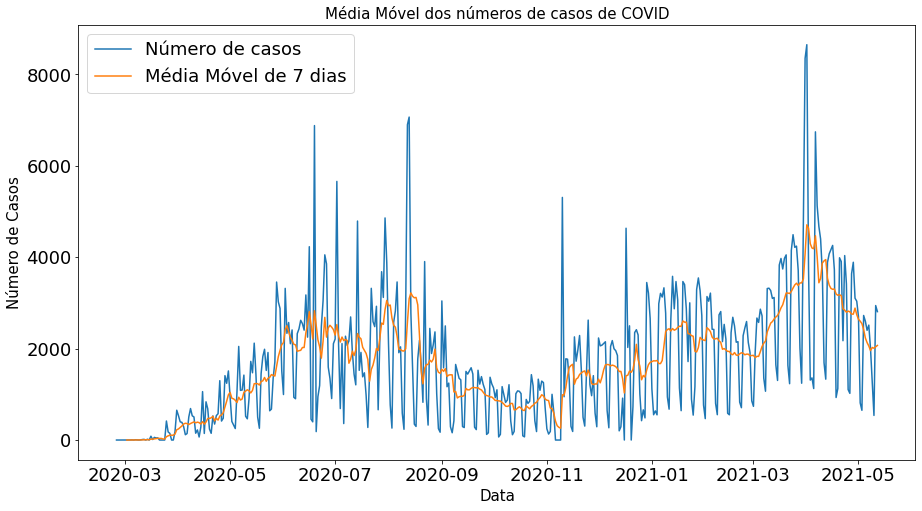

In [19]:
plt.title("Média Móvel dos números de casos de COVID", size = 15)
plt.xlabel('Data', size =15)
plt.ylabel("Número de Casos", size = 15)

sns.lineplot(x = "datahora", y= "casos_novos", data = dados_sp)
sns.lineplot(x="datahora", y="media_movel_casos", data=dados_sp )

plt.legend(["Número de casos", "Média Móvel de 7 dias"])

#Desafio 04: Gerar o gráfico da média móvel do número de óbitos e mudar os gráficos de casos para barras.

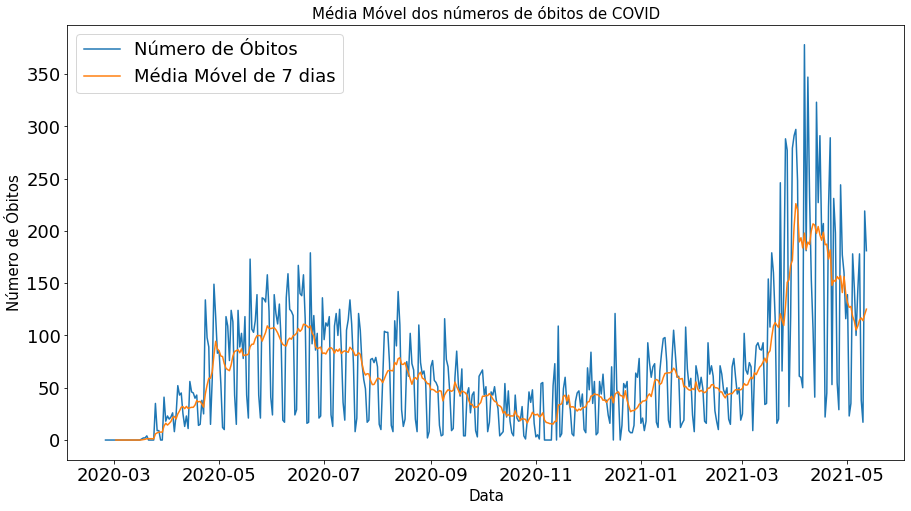

In [20]:
plt.title("Média Móvel dos números de óbitos de COVID", size = 15)
plt.xlabel('Data', size =15)
plt.ylabel("Número de Óbitos", size = 15)

sns.lineplot(x = "datahora", y="obitos_novos", data = dados_sp)
sns.lineplot(x = "datahora", y="media_movel_obitos", data = dados_sp)


plt.legend(["Número de Óbitos", "Média Móvel de 7 dias"])

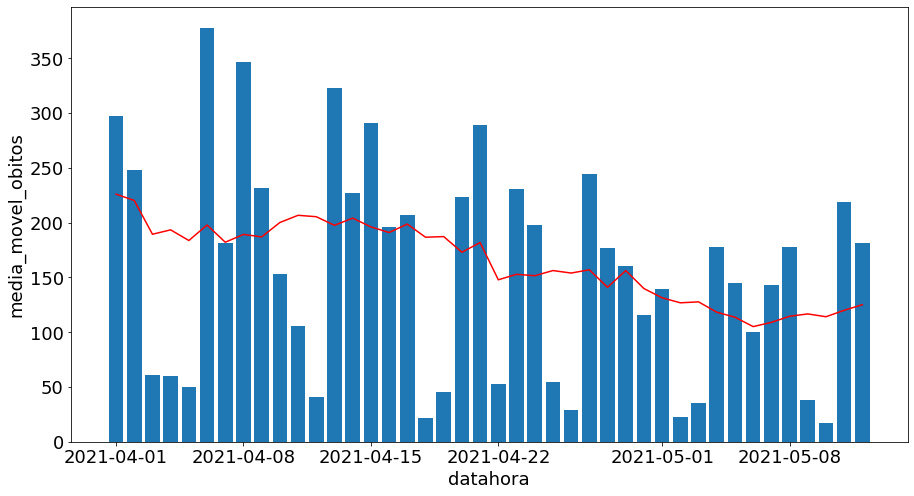

In [21]:
plt.bar(dados_periodo2021['datahora'], dados_periodo2021['obitos_novos'])
sns.lineplot(x='datahora', y='media_movel_obitos', data = dados_periodo2021, color = 'red')


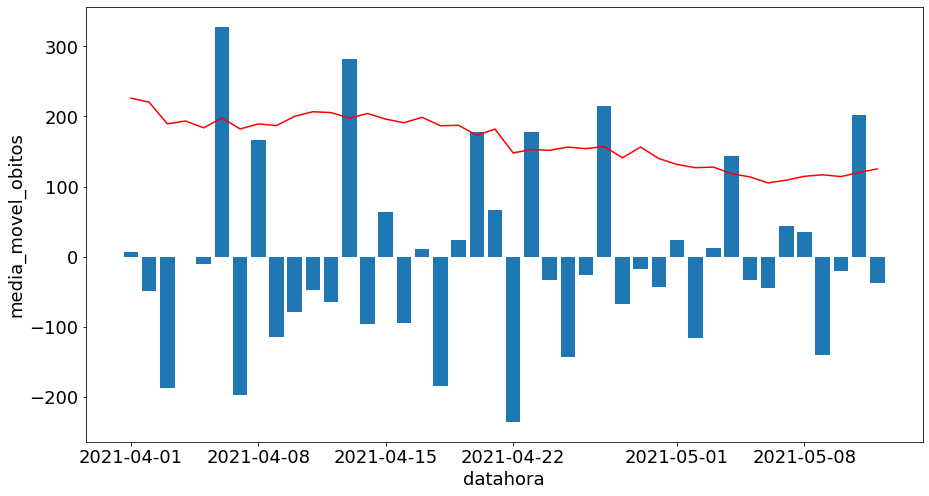

In [22]:
plt.bar(dados_periodo2021['datahora'], dados_periodo2021['taxa_de_crescimento_obitos'])
sns.lineplot(x='datahora', y='media_movel_obitos', data = dados_periodo2021, color = 'red')

#Desafio 05: Mover o número de óbitos alguns dias para verificar o resultado no gráfico.

In [30]:
from datetime import *

In [64]:
dados_sp["datahora2"] = dados_sp["datahora"] + pd.to_timedelta(10, unit='d')
dados_sp["mes2"] = pd.DatetimeIndex(dados_sp["datahora2"]).month
dados_sp["ano2"] = pd.DatetimeIndex(dados_sp["datahora2"]).year

In [85]:
dados_2000 = dados_sp.query("ano == 2020 & mes >= 4 & mes <= 6" )
dados_2000_movidos = dados_sp.query("ano2 == 2020 & mes >= 4 & mes <= 6")

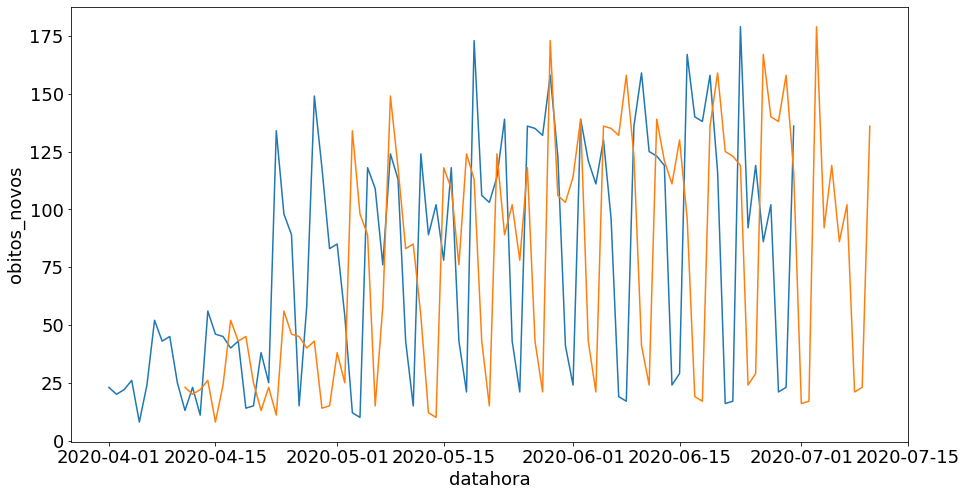

In [86]:
sns.lineplot(x = "datahora", y= "obitos_novos", data = dados_2000)
sns.lineplot(x = "datahora2", y= "obitos_novos", data = dados_2000)

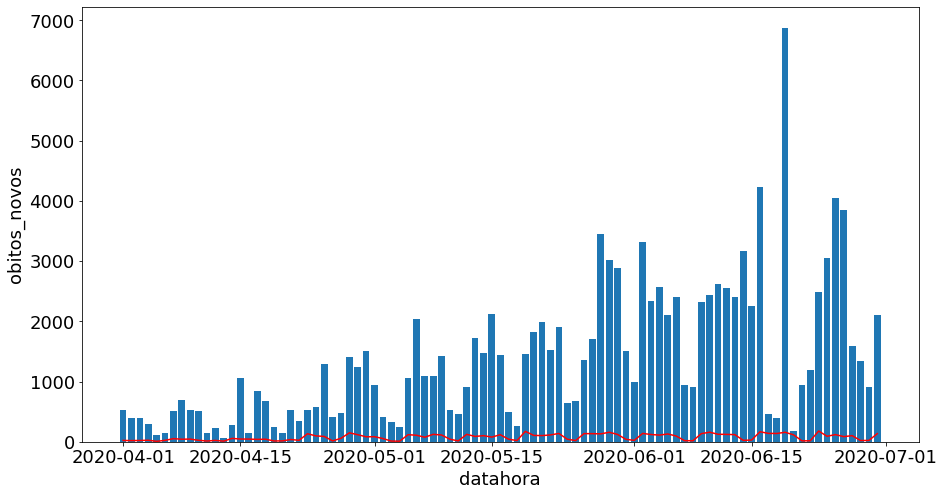

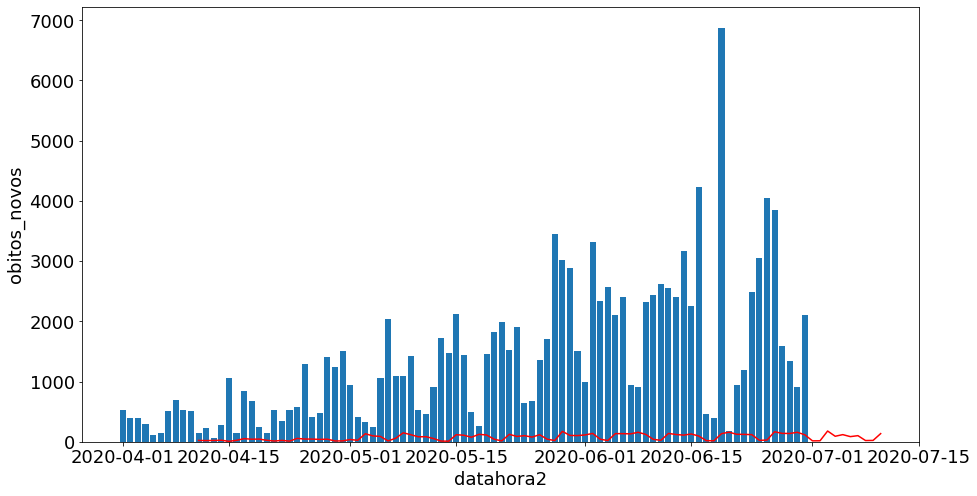

In [87]:
plt.bar(dados_2000['datahora'], dados_2000['casos_novos'])
sns.lineplot(x='datahora', y='obitos_novos', data = dados_2000, color = 'red')
plt.show()
plt.bar(dados_2000['datahora'], dados_2000['casos_novos'])
sns.lineplot(x='datahora2', y='obitos_novos', data = dados_2000, color = 'red')
plt.show()

#Desafio 06: Função de correlação cruzada dos óbitos e casos.

In [88]:
dados_sp[['casos_novos', 'obitos_novos']].corr()

,casos_novos,obitos_novos
casos_novos,1.000000,0.735532
obitos_novos,0.735532,1.000000


#Desafio 07: Estudar outros municípios.

##Analisando Ribeirão Preto -SP

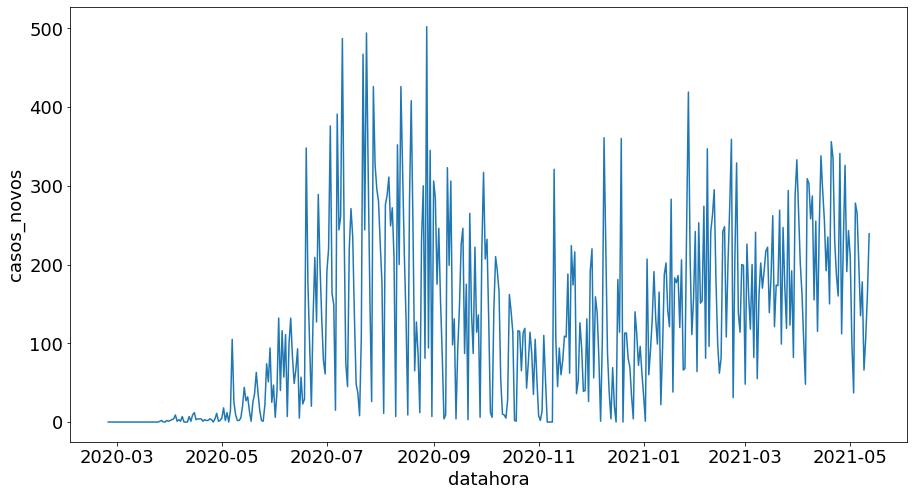

In [90]:
sns.lineplot(x= "datahora", y="casos_novos", data = dados_rp)

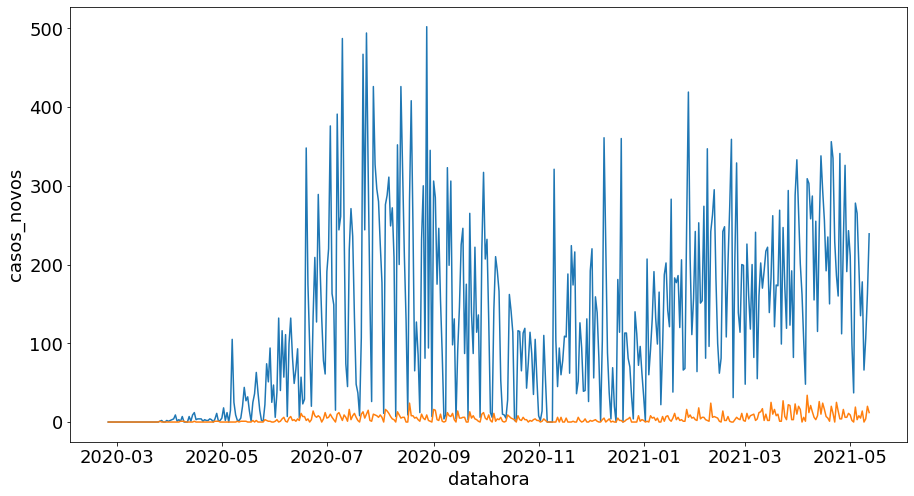

In [91]:
sns.lineplot(x= "datahora", y="casos_novos", data = dados_rp)
sns.lineplot(x= "datahora", y="obitos_novos", data = dados_rp)

In [94]:
#media movel para ribeiao preto
dados_rp["taxa_de_crescimento_casos"] = dados_rp["casos_novos"].diff()
dados_rp["taxa_de_crescimento_obitos"] = dados_rp["obitos_novos"].diff()

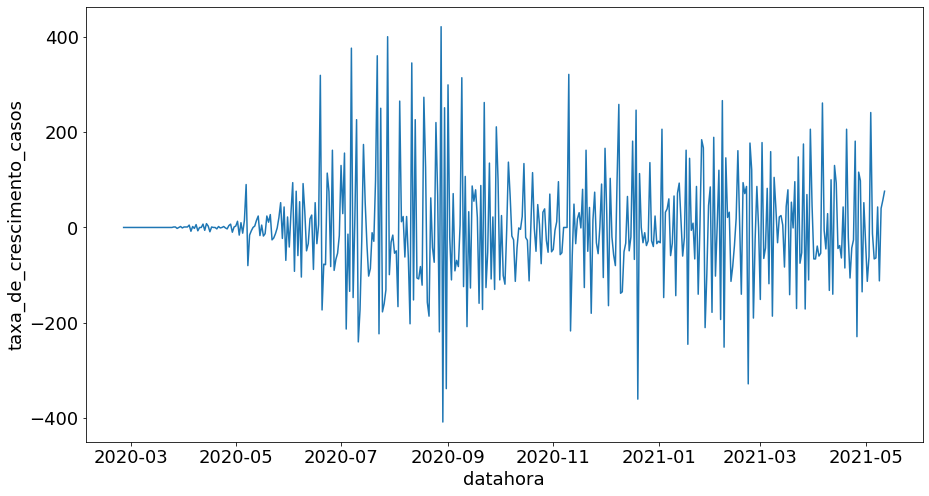

In [98]:
#taxa de crescimento de casos em ribeirão preto
sns.lineplot(x="datahora", y="taxa_de_crescimento_casos", data = dados_rp)

In [120]:
dados_rp["mes"] = pd.DatetimeIndex(dados_rp["datahora"]).month
dados_rp["ano"] = pd.DatetimeIndex(dados_rp["datahora"]).year

In [121]:
dados_rp_2021_inicio = dados_rp.query("ano == 2020 & mes>= 5 & mes <= 9")

###numero de obitos e casos no inicio da pandemia

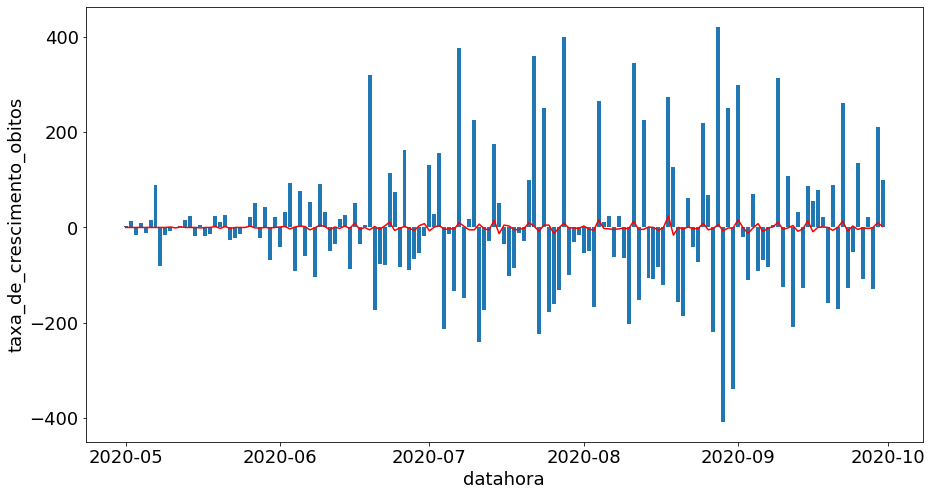

In [122]:

plt.bar(dados_rp_2021_inicio["datahora"], dados_rp_2021_inicio["taxa_de_crescimento_casos"])
sns.lineplot(x="datahora", y="taxa_de_crescimento_obitos", data = dados_rp_2021_inicio, color="red")

In [123]:
dados_rp_2021_final = dados_rp.query("ano == 2021 & mes>= 1 & mes <= 5")

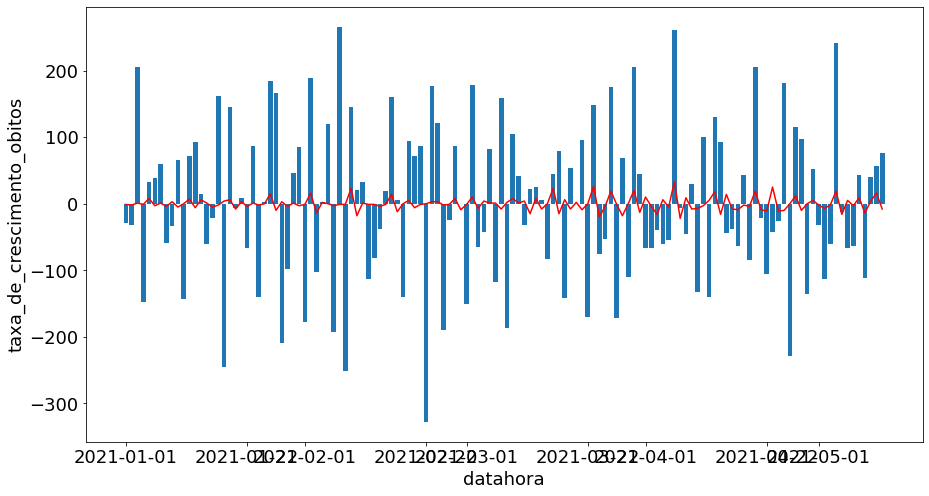

In [124]:
plt.bar(dados_rp_2021_final["datahora"], dados_rp_2021_final["taxa_de_crescimento_casos"])
sns.lineplot(x="datahora", y="taxa_de_crescimento_obitos", data = dados_rp_2021_final, color="red")

###Verificar a média movel em Ribeirão Preto para os casos e obitos

In [148]:
dados_rp["media_movel_obitos"] = dados_rp["obitos_novos"].rolling(window=30, center=False).mean()
dados_rp["media_movel_casos"] = dados_rp["casos_novos"].rolling(window=30, center=False).mean()

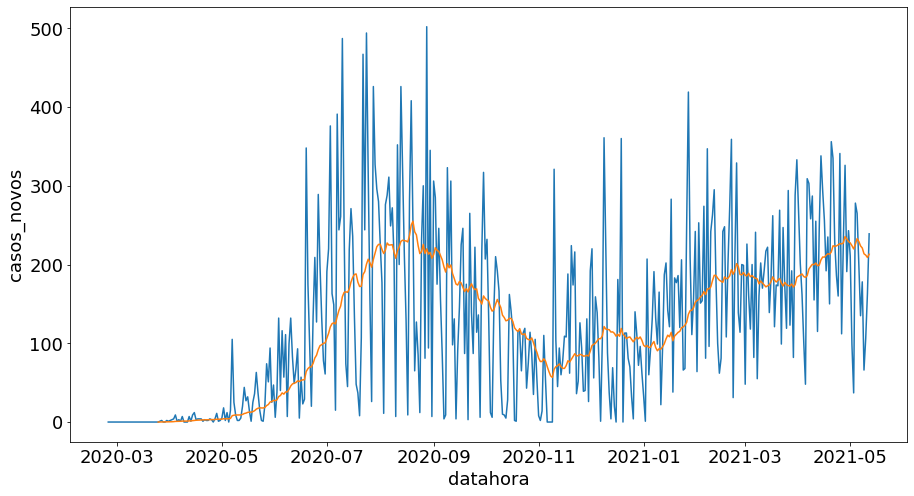

In [149]:
sns.lineplot(x="datahora", y="casos_novos", data=dados_rp)
sns.lineplot(x="datahora", y="media_movel_casos", data=dados_rp)

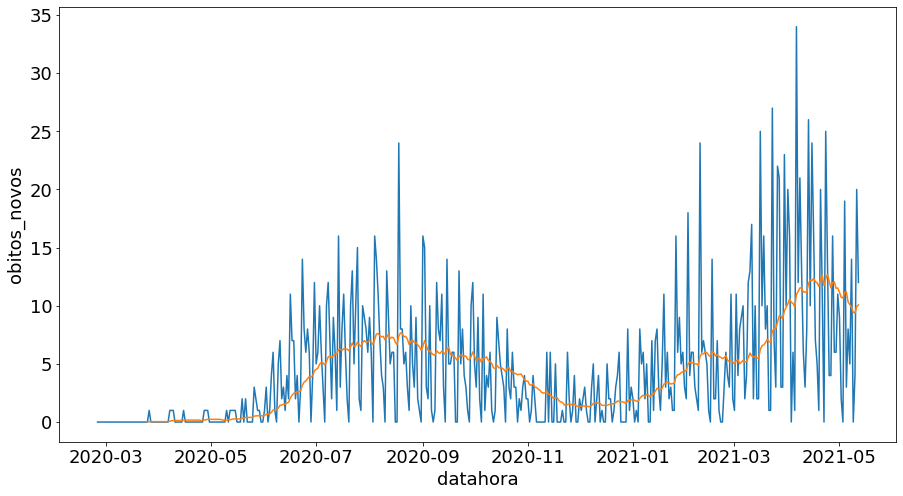

In [150]:
sns.lineplot(x="datahora", y="obitos_novos", data=dados_rp)
sns.lineplot(x="datahora", y="media_movel_obitos", data=dados_rp)

###Auto correlação de casos e obitos

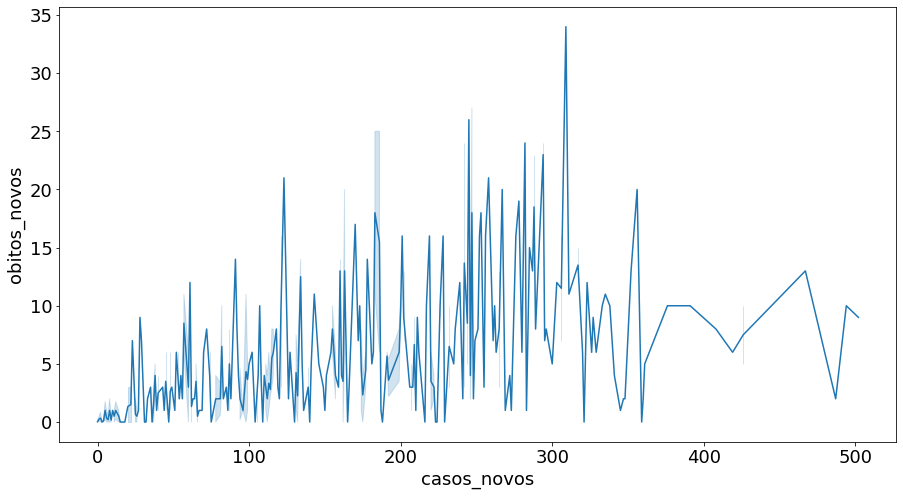

In [159]:
sns.lineplot(x="casos_novos", y="obitos_novos", data = dados_rp)

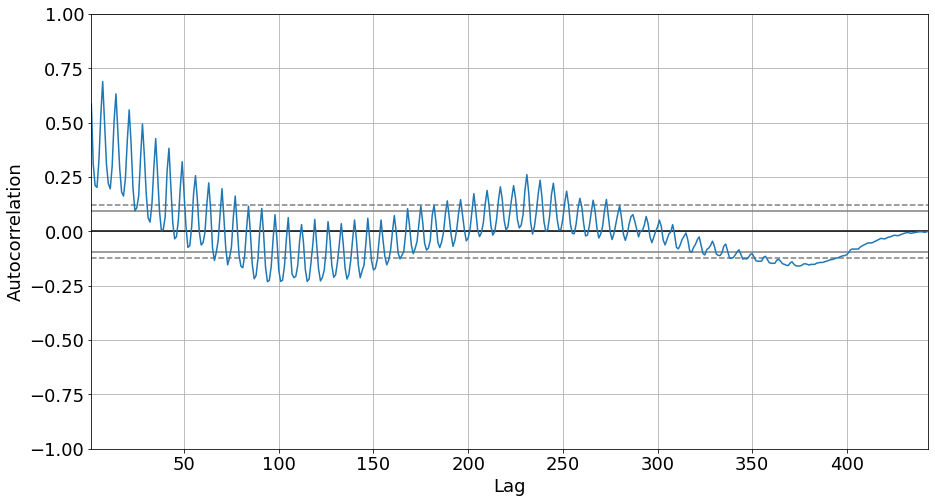

In [160]:
autocorrelation_plot(dados_sp["casos_novos"])

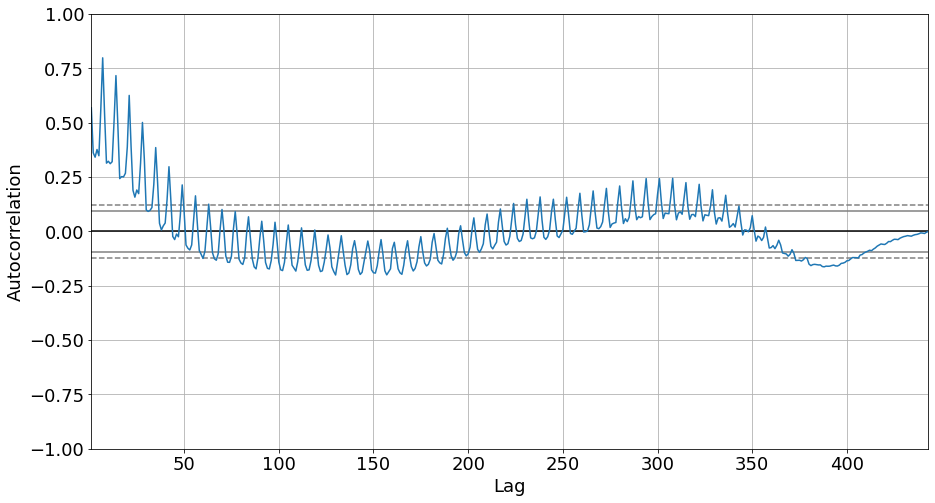

In [157]:
autocorrelation_plot(dados_sp["obitos_novos"])